**Name:** \_\_\_\_\_

**EID:** \_\_\_\_\_

# Tutorial 6: Linear Dimensionality Reduction and Face Recognition

In this tutorial, you will use linear dimensionality reduction on face images, and then train a classifier for face recognition.

First, we need to initialize Python.  Run the below cell.

In [72]:
%matplotlib inline
import IPython.core.display
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from joblib import *
from numpy import *
from sklearn import *
import glob
import os
random.seed(100)

C:\Users\HAOYCH~1\AppData\Local\Temp/ipykernel_32480/2185687890.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.core.display.set_matplotlib_formats("svg")


## 1. Loading Data and Pre-processing
We first need to load the images.  Download `olivetti_py3.pkz` from Canvas, and place it in the same directory as this ipynb file.  _DO NOT UNZIP IT_.  Then run the following cell to load the images.

In [73]:
oli = datasets.fetch_olivetti_faces(data_home="./")
X = oli.data
Y = oli.target
img = oli.images
imgsize = oli.images[0].shape

Each image is a 64x64 array of pixel values, resulting in a 4096-dimensional vector.  Run the below code to show an example:

(64, 64)


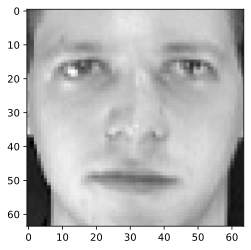

In [74]:
print(img[0].shape)
plt.imshow(img[0], cmap='gray', interpolation='nearest')
plt.show()

Run the below code to show all the images!

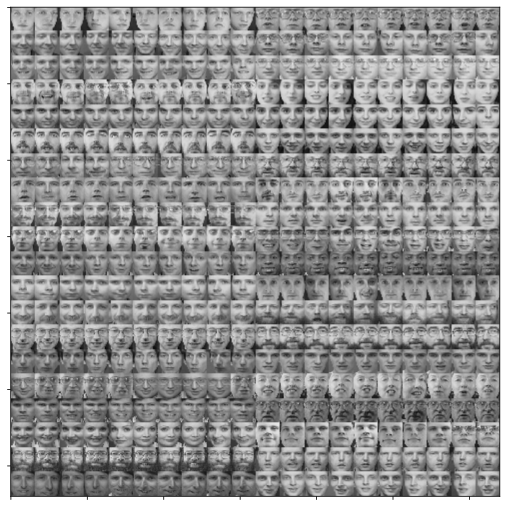

In [75]:
tmp = []
for i in range(0,400,20):
    tmp.append( hstack(img[i:i+20]) )
allimg = vstack(tmp)
plt.figure(figsize=(9,9))
plt.imshow(allimg, cmap='gray', interpolation='nearest')
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])
plt.show()

Each person is considered as one class, and there are 10 images for each class.  In total there are 40 classes (people).  The data is already vectorized and put into the matrix `X`. The class labels are in vector `Y`. Now we split the data into training and testing sets.

In [76]:
# randomly split data into 80% train and 20% test set
trainX, testX, trainY, testY = \
  model_selection.train_test_split(X, Y,
  train_size=0.80, test_size=0.20, random_state=100)

print(trainX.shape)
print(testX.shape)

(320, 4096)
(80, 4096)


## 2. Principal Component Analysis - PCA
The dimension of the data is too large (4096) so learning classifiers will take a long time.  Instead, our strategy is to use PCA to reduce the dimension first and then use the PCA weights as the representation for each image.  Run PCA on the data using 9 principal components.

In [77]:
### INSERT YOUR CODE HERE
## HINT
# 1.decomposition.PCA(n_components=9)

In [78]:
### INSERT YOUR CODE HERE
pca = decomposition.PCA(n_components=9)
trainW = pca.fit_transform(trainX)  # fit the training set
testW  = pca.transform(testX)  # use the pca model to transform the test set

In [79]:
trainX.dtype

dtype('float32')

The below function will plot the basis vectors of PCA. Run the next 2 cells to view the PCs.

In [80]:
def plot_basis(model, imgsize):
    cname = model.__class__.__name__
    if  cname == 'LDA':
        KK = model.n_components
        comps = model.coef_
        mn    = None
    elif cname == 'PCA':
        KK = model.n_components_
        comps = model.components_
        mn    = model.mean_
    elif cname == 'NMF':
        KK = model.n_components_
        comps = model.components_
        mn    = None 
    elif cname == 'TruncatedSVD':
        KK = model.components_.shape[0]
        comps = model.components_
        mn    = None
    K = KK
    if mn is not None:
        K += 1
    nr = ceil(K/5.0)
    sind = 1

    #vmin = comps.flatten().min()
    #vmax = comps.flatten().max()

    # plot the mean
    pcfig = plt.figure(figsize=(8,nr*2))
    if mn is not None:
        plt.subplot(int(nr),5,sind)
        plt.imshow(mn.reshape(imgsize), interpolation='nearest')
        plt.title("mean")
        plt.gray()
        plt.gca().xaxis.set_ticklabels([])
        plt.gca().yaxis.set_ticklabels([])
        sind += 1
    # plot the components
    for j in range(0,KK):
        plt.subplot(int(nr),5,sind)
        v = comps[j,:]
        I = v.reshape(imgsize)
        plt.imshow(I, interpolation='nearest')
        plt.gray()
        plt.title("basis " + str(j+1))
        plt.gca().xaxis.set_ticklabels([])
        plt.gca().yaxis.set_ticklabels([])
        sind += 1

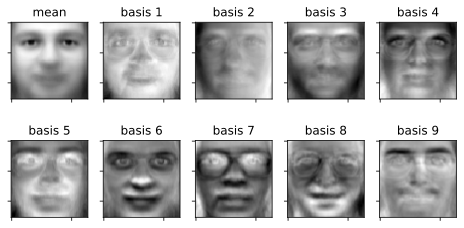

In [81]:
# run the function
plot_basis(pca, imgsize)

_What do the basis images look like? Do some basis images correspond to particular facial features?_
- **INSERT YOUR ANSWER HERE**

- **INSERT YOUR ANSWER HERE**
- mean is the average face
- basis 7, 8, and 9 are different glasses frames
- basis 3 is about eye brows
- basis 4 is about eyes.

### Face Recognition
Now train a logistic classifier to do the face recognition.  Use the calculated PCA representation as the new set of inputs.  Use cross-validation to set the hyperparameters of the classifier.  You do not need to do cross-validation for the number of components. Calculate the average training and testing accuracies.  Remember to transform the test data into the PCA representation too!



In [82]:
### INSERT YOUR CODE HERE
## HINT
# 1. linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1)
# 2. calculate accuracy: metrics.accuracy_score

In [83]:
### INSERT YOUR CODE HERE
logreg = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1)
logreg.fit(trainW, trainY)

# predict from the model
predYtrain = logreg.predict(trainW)
predYtest  = logreg.predict(testW)

# calculate accuracy
acc      = metrics.accuracy_score
print("train accuracy =", acc)

# calculate accuracy
acc      = metrics.accuracy_score(testY,predYtest)
print("test accuracy  =", acc)

train accuracy = <function accuracy_score at 0x00000216E9438040>
test accuracy  = 0.7625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Finding the Best Number of Components
Now try a range of number of components for PCA to get the best test accuracy.  Train a classifier for each one and see which dimension gives the best testing accuracy.  Make a plot of PCA dimension vs. test accuracy.

In [84]:
### INSERT YOUR CODE HERE
## HINT
# 1. n = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90] #components
# 2. decomposition.PCA(n_components=n)
# 3. linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1)
# 4. calculate accuracy: metrics.accuracy_score

In [85]:
ns=[1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

params = {'C': logspace(-6,3,15)}
trainacc = []
testacc = []
for n in ns:
    pca = decomposition.PCA(n_components=n)
    trainW = pca.fit_transform(trainX)  # fit the training set
    testW  = pca.transform(testX)  # use the pca model to transform the test set

    clf = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1)
    clf.fit(trainW, trainY)

    # predict from the model
    predYtrain = clf.predict(trainW)
    predYtest  = clf.predict(testW)

    # calculate accuracy
    acc      = metrics.accuracy_score(trainY, predYtrain)
    trainacc.append(acc)

    # calculate accuracy
    acc      = metrics.accuracy_score(testY, predYtest)
    testacc.append(acc)
    print(n, ":",acc)


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1 : 0.1


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5 : 0.55


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10 : 0.8375
15 : 0.9


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


20 : 0.95


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


25 : 0.9625
30 : 0.9625
35 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


40 : 0.9625
45 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


50 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


55 : 0.9625
60 : 0.9625
65 : 0.9625
70 : 0.9625
75 : 0.9625
80 : 0.9625
85 : 0.9625
90 : 0.9625


Text(0, 0.5, 'accuracy')

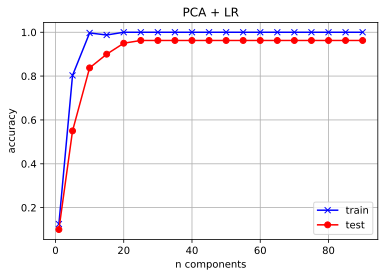

In [86]:
plt.plot(ns, trainacc, 'bx-', label='train')
plt.plot(ns, testacc, 'ro-', label='test')
plt.title("PCA + LR")
plt.legend(loc=0)
plt.grid(True); plt.xlabel('n components'); plt.ylabel('accuracy')

_What is the best number of components?  View the basis images to see what they look like._
- **INSERT YOUR ANSWER HERE**

- **INSERT YOUR ANSWER HERE**
- about 20 components is sufficient to get maximum accuracy.

Plot the basis vectors of PCA with 20 components.

In [87]:
### INSERT YOUR CODE HERE

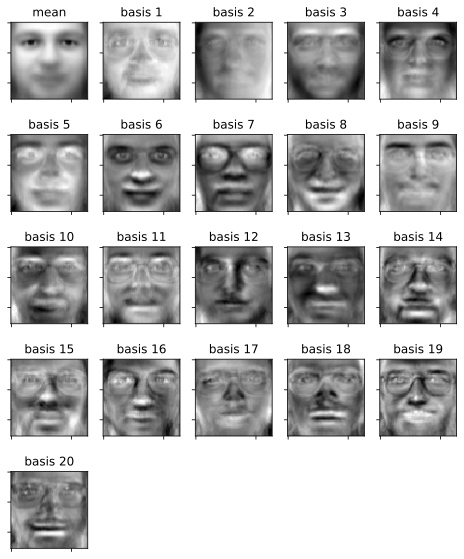

In [88]:
### INSERT YOUR CODE HERE
pca = decomposition.PCA(n_components=20)
trainW = pca.fit_transform(trainX)  # fit the training set
plot_basis(pca, imgsize)

# 3. Linear Dimensionality Reduction - SVD

Now we will repeat the experiment using SVD instead of PCA. Perform SVD with 9 components and visualize the basis images.

In [89]:
### INSERT YOUR CODE HERE
## HINT
# 1. decomposition.TruncatedSVD(n_components=9)

In [90]:
svd = decomposition.TruncatedSVD(n_components=9)
trainW = svd.fit_transform(trainX)
testW  = svd.transform(testX)

### Finding the Best Number of Components
Now find the number of components that gives the best test accuracy.  Use the same type of classifier that you used in the previous experiment.  Use cross-validation to select the hyperparameters of the classifier.  You do not need to do cross-validation for the number of components.

In [91]:
### INSERT YOUR CODE HERE
## HINT
# 1. n = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90] #components
# 2. decomposition.TruncatedSVD(n_components=n)
# 3. linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1)
# 4. calculate accuracy: metrics.accuracy_score

In [92]:
ns=[1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

params = {'C': logspace(-6,3,15)}
trainacc = []
testacc = []
for n in ns:
    svd = decomposition.TruncatedSVD(n_components=n)
    trainW = svd.fit_transform(trainX)  # fit the training set
    testW  = svd.transform(testX)  # use the pca model to transform the test set

    clf = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=3, n_jobs=-1)
    clf.fit(trainW, trainY)

    # predict from the model
    predYtrain = clf.predict(trainW)
    predYtest  = clf.predict(testW)

    # calculate accuracy
    acc      = mean(trainY==predYtrain)
    trainacc.append(acc)

    # calculate accuracy
    acc      = mean(testY==predYtest)
    testacc.append(acc)
    print(n,":",acc)

1 : 0.075


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5 : 0.525


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10 : 0.8375


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


15 : 0.925


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


20 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


25 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


30 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


35 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


40 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


45 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


50 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


55 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


60 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


65 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


70 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


75 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


80 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


85 : 0.9625
90 : 0.9625


C:\Users\haoychen3\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'accuracy')

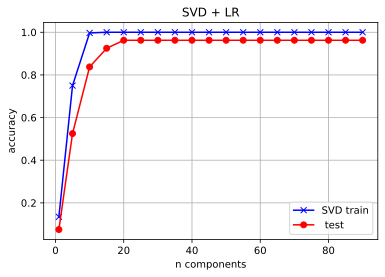

In [93]:
plt.plot(ns, trainacc, 'bx-', label='SVD train')
plt.plot(ns, testacc, 'ro-', label=' test')
plt.title("SVD + LR")
plt.legend(loc=0)
plt.grid(True); plt.xlabel('n components'); plt.ylabel('accuracy')

_Which number of components gives the best test result? How does the accuracy compare to the best PCA result?  Why is SVD or PCA better?_
- **INSERT YOUR ANSWER HERE**

- **INSERT YOUR ANSWER HERE**
- 20 components will have good results.
- PCA is better (test accuracy > 90%), and more stable than SVD.

Plot the basis vectors of PCA with 35 components.

In [94]:
### INSERT YOUR CODE HERE

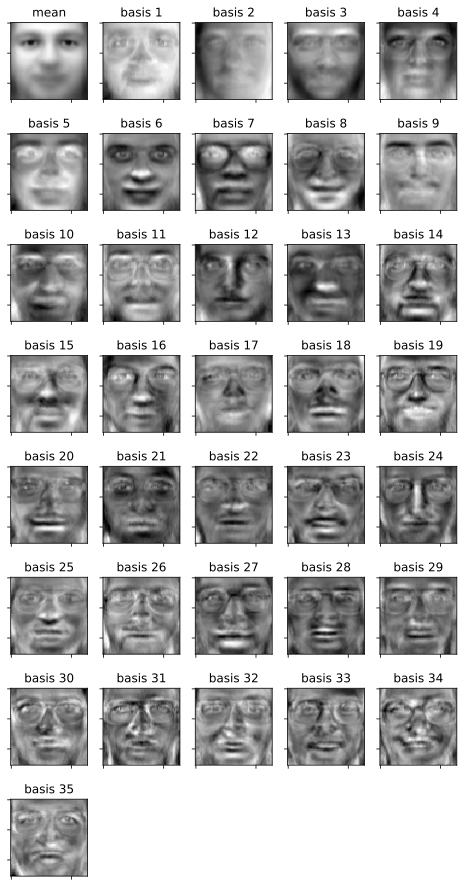

In [95]:
### INSERT YOUR CODE HERE
pca = decomposition.PCA(n_components=35)
trainW = pca.fit_transform(trainX)  # fit the training set
plot_basis(pca, imgsize)

Plot the basis vectors of SVD with 35 components.

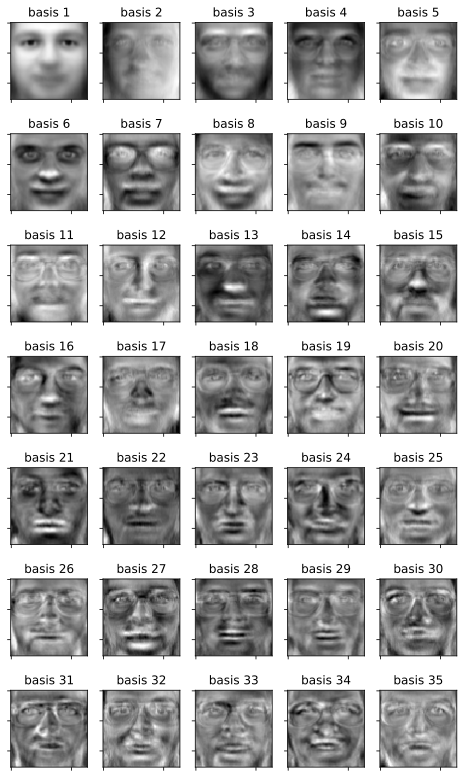

In [96]:
svd = decomposition.TruncatedSVD(n_components=35)
trainW = svd.fit_transform(trainX)
plot_basis(svd, imgsize)